# Ocean Circulation Diagnostics

### PATH to import function

In [1]:
import os
os.chdir("..")
print(os.getcwd())


/home/b/b382119/AQUA/diagnostics/ocean_circulation


### Import modules

In [2]:
%load_ext autoreload
%autoreload 2
from aqua import Reader,catalogue, inspect_catalogue
import ocean_circulation_func as fn
from aqua.util import load_yaml


### Config file

In [3]:
config = load_yaml("config.yaml")
stratification_params = config['stratification']
MLD_params = config['MLD']


In [4]:
config

{'model': 'FESOM', 'exp': 'tco2559-ng5-cycle3', 'source': 'lra-r100-monthly', 'stratification': {'region': 'Labrador Sea', 'latS': None, 'latN': None, 'lonE': None, 'lonW': None, 'time': 'DJF', 'output': True, 'output_dir': './output'}, 'MLD': {'region': 'Labrador Sea', 'latS': None, 'latN': None, 'lonE': None, 'lonW': None, 'time': 'DJF', 'output': True, 'output_dir': './output'}}

### Model Data import

In [5]:
# Here we load the data of a model (chosen from the catalog as an example )
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
data = reader.retrieve()

data=data.rename({"nz1":"lev"}) # We standardise the name for the vertical dimension
data=data[["ocpt","so"]].resample(time="M").mean() # And we keep only the relevant variables in the dataset

## Functions:
    There are several functions in ocean_circulation_func

    The two main diagnostics functions are:
### 1. plot_stratification
plot_stratification(mod_data, region=None, time = None, latS:   float=None, latN: float=None, lonW: float=None,lonE: float=None, output= bool, output_dir="./figs")

    This function produces climatological stratification plots over a region in a model dataset and EN4 observations. It produces three lines, one for the whole model simulation, one for the model in the overlap period with EN4, and another for EN4 in the overlap period with the model. If there is no overlap period with observations, EN4 climatology is provided for the period 1950-2022.

    It requires you to provide: 
    - A file with model data of 3D ocean potential temperature and practical salinity
    - A specific region where stratification is computed (or to provide a custom latxlon box instead)
    - The temporal resolution over which the climatology is computed (annual, a given season or a given month). 
     

### 2. #plot_spatial_mld
plot_spatial_mld(data, region=None, time = None, latS: float=None, latN: float=None, lonW: float=None,lonE: float=None, output= bool, output_dir="./figs")

    This function computes the mixed layer depth from monthly 3D ocean potential temperature and practical salinity, both for a model simulation and EN4 observations, and plots their climatology.
    
    It requires you to provide:
    - A file with model data of 3D ocean potential temperature and practical salinity
    - A specific latitudinal/longitudinal box over which the MLD is shown
    - The temporal resolution over which the climatology is computed (annual, a given season or a given month)




## Example

2023-07-10 13:17:40,895 - INFO - loaded EN4 data
2023-07-10 13:17:40,956 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 13:17:40,957 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-10 13:17:41,041 - INFO - practical salinity converted to absolute salinity
2023-07-10 13:17:41,228 - INFO - potential temperature converted to conservative temperature
2023-07-10 13:17:41,618 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 13:17:41,653 - INFO - data selected for djf climatology
2023-07-10 13:17:41,654 - INFO - Selected for this region (latitude 50.0 to 65.0, longitude 300.0 to 325.0)
2023-07-10 13:17:41,691 - INFO - practical salinity converted to absolute salinity
2023-07-10 13:17:41,766 - INFO - potential temperature converted to conservative temperature
2023-07-10 13:17:41,906 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 13:17:4

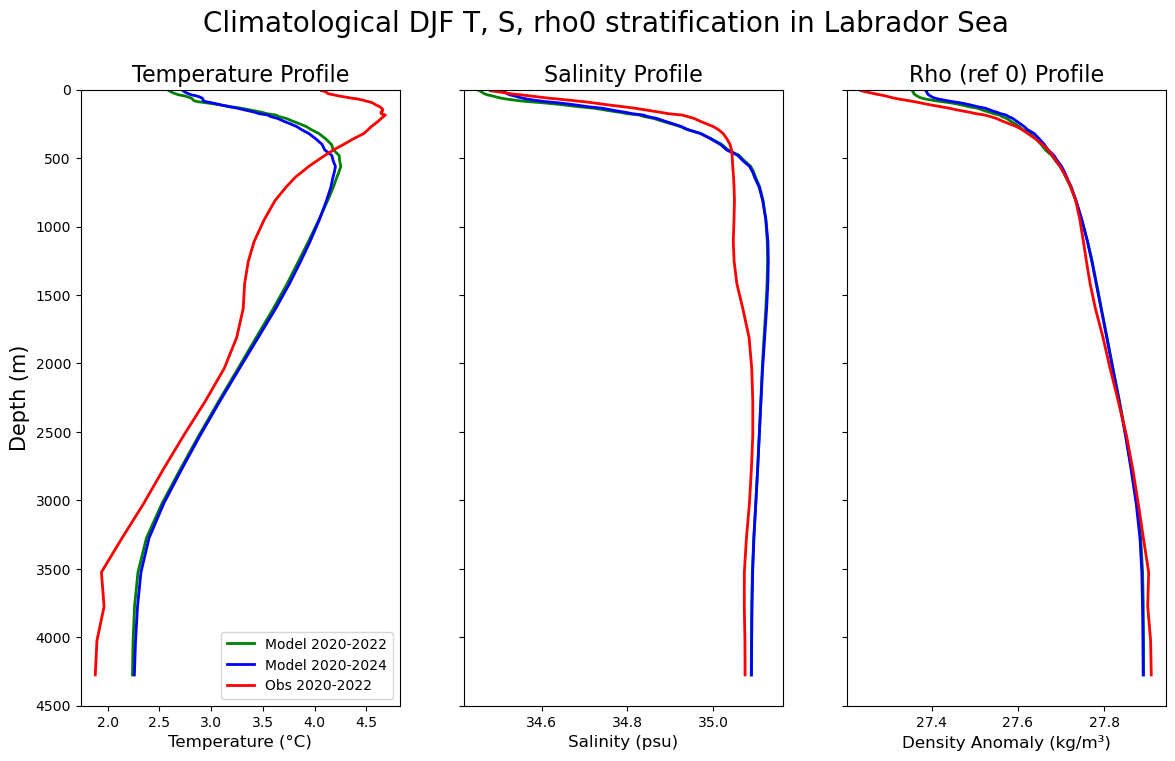

In [9]:
# To plot the climatological Labrador Sea stratification in DJF in the first 50 months of the model
fn.plot_stratification(data.isel(time=slice(0,50)), region= "Labrador Sea", time = "DJF",output= True, output_dir="./output")

2023-07-10 18:01:30,489 - INFO - loaded EN4 data
2023-07-10 18:01:30,499 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 18:01:30,501 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 18:01:30,508 - INFO - Selected for this region (latitude 50.0 to 80.0, longitude -70.0 to 20.0)
2023-07-10 18:01:30,510 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:01:30,575 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:01:30,690 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 18:01:30,798 - INFO - data selected for fma climatology
2023-07-10 18:01:30,816 - INFO - Selected for this region (latitude 50.0 to 80.0, longitude -70.0 to 20.0)
2023-07-10 18:01:30,821 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:01:30,954 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:01:31,22

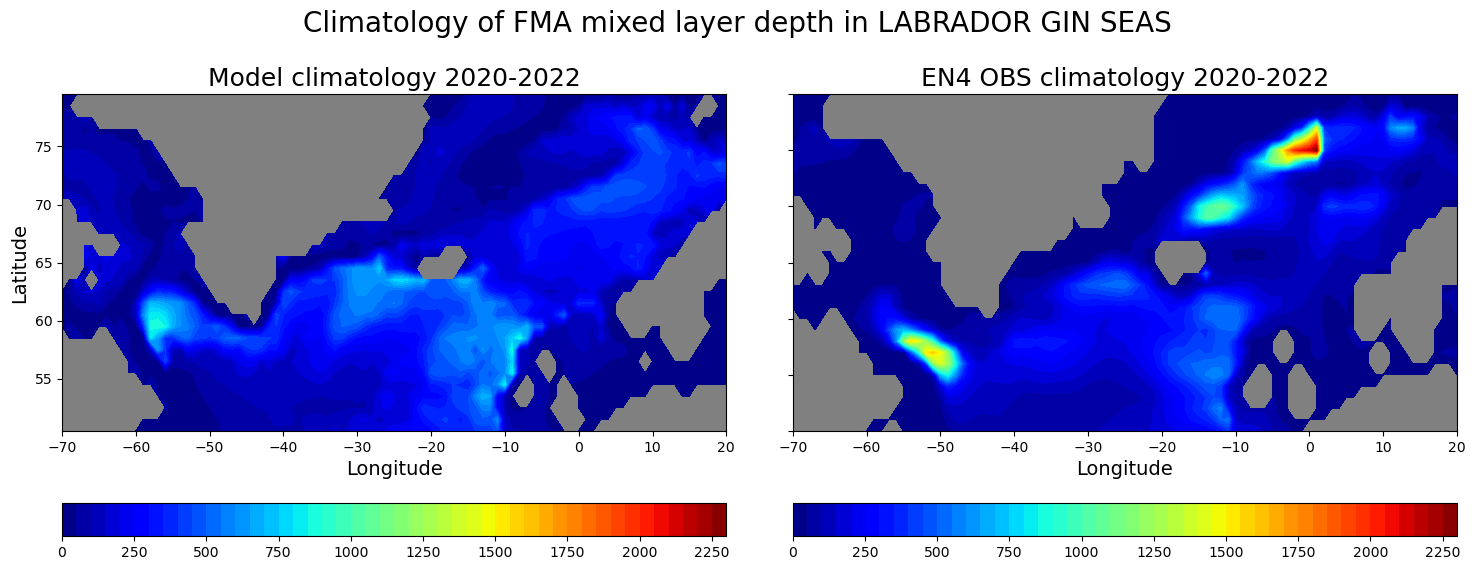

In [59]:
# To plot the climatological MLD in DJF in the Labrador and GIN Seas for the whole range of the Model and Obs datasets

fn.plot_spatial_mld_clim(data, region= "labrador_gin_seas", time = "fma",overlap= True,output= True, output_dir="./output")

In [60]:
# This repeats the plots but now for the climatologies computed for the whole length of each dataset
fn.plot_spatial_mld_clim(data, region= "labrador_gin_seas", time = "FMA",output= True, output_dir="./output")

2023-07-10 18:02:19,241 - INFO - loaded EN4 data
2023-07-10 18:02:19,252 - INFO - Selected for this region (latitude 50.0 to 80.0, longitude -70.0 to 20.0)
2023-07-10 18:02:19,255 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:02:19,318 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:02:19,433 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 18:02:19,544 - INFO - data selected for fma climatology
2023-07-10 18:02:19,592 - INFO - Selected for this region (latitude 50.0 to 80.0, longitude -70.0 to 20.0)
2023-07-10 18:02:19,600 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:02:19,743 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:02:20,029 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 18:02:20,487 - INFO - data selected for fma climatology
2023-07-10 18:02:20,530 - INFO - Spatial MLD plot i

2023-07-10 16:54:15,671 - INFO - loaded EN4 data
2023-07-10 16:54:15,712 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 16:54:15,712 - INFO - Selected for this region (latitude -80.0 to -65.0, longitude 290.0 to 350.0)
2023-07-10 16:54:15,769 - INFO - practical salinity converted to absolute salinity
2023-07-10 16:54:15,892 - INFO - potential temperature converted to conservative temperature
2023-07-10 16:54:16,146 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 16:54:16,170 - INFO - data selected for jja climatology
2023-07-10 16:54:16,171 - INFO - Selected for this region (latitude -80.0 to -65.0, longitude 290.0 to 350.0)
2023-07-10 16:54:16,198 - INFO - practical salinity converted to absolute salinity
2023-07-10 16:54:16,253 - INFO - potential temperature converted to conservative temperature
2023-07-10 16:54:16,352 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 16:

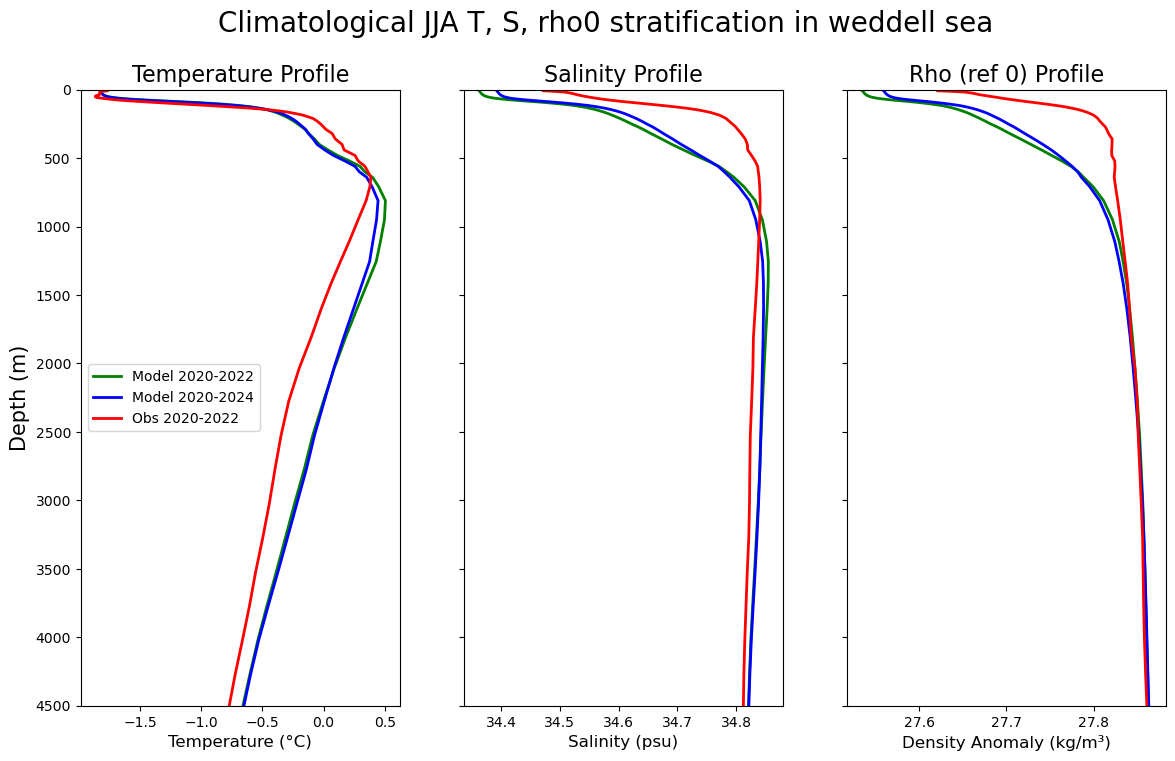

In [17]:
# This example computes stratification in the Weddell Sea in the boreal winter
fn.plot_stratification(data, region= "weddell sea",time = "JJA", output= True, output_dir="./output")



2023-07-10 18:00:13,223 - INFO - loaded EN4 data
2023-07-10 18:00:13,232 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 18:00:13,234 - INFO - selected the overlaped time of the obs data compare to the model
2023-07-10 18:00:13,235 - INFO - Selected for this region (latitude -80.0 to -50.0, longitude 0.0 to 360.0)
2023-07-10 18:00:13,238 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:00:13,302 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:00:13,416 - INFO - Calculated potential density in-situ at reference pressure 0 dbar 
2023-07-10 18:00:13,524 - INFO - data selected for jja climatology
2023-07-10 18:00:13,529 - INFO - Selected for this region (latitude -80.0 to -50.0, longitude 0.0 to 360.0)
2023-07-10 18:00:13,534 - INFO - practical salinity converted to absolute salinity
2023-07-10 18:00:13,668 - INFO - potential temperature converted to conservative temperature
2023-07-10 18:00:13,

<xarray.DataArray ()>
array(0.08077994)
Attributes:
    units:          degrees_north
    standard_name:  latitude
    axis:           Y <xarray.DataArray ()>
array(1.61559889)
Attributes:
    units:          degrees_north
    standard_name:  latitude
    axis:           Y


2023-07-10 18:00:30,926 - INFO - Figure and data used for this plot are saved here: ./output/20230710_180014_spatial_MLD_JJA_southern_ocean_mean


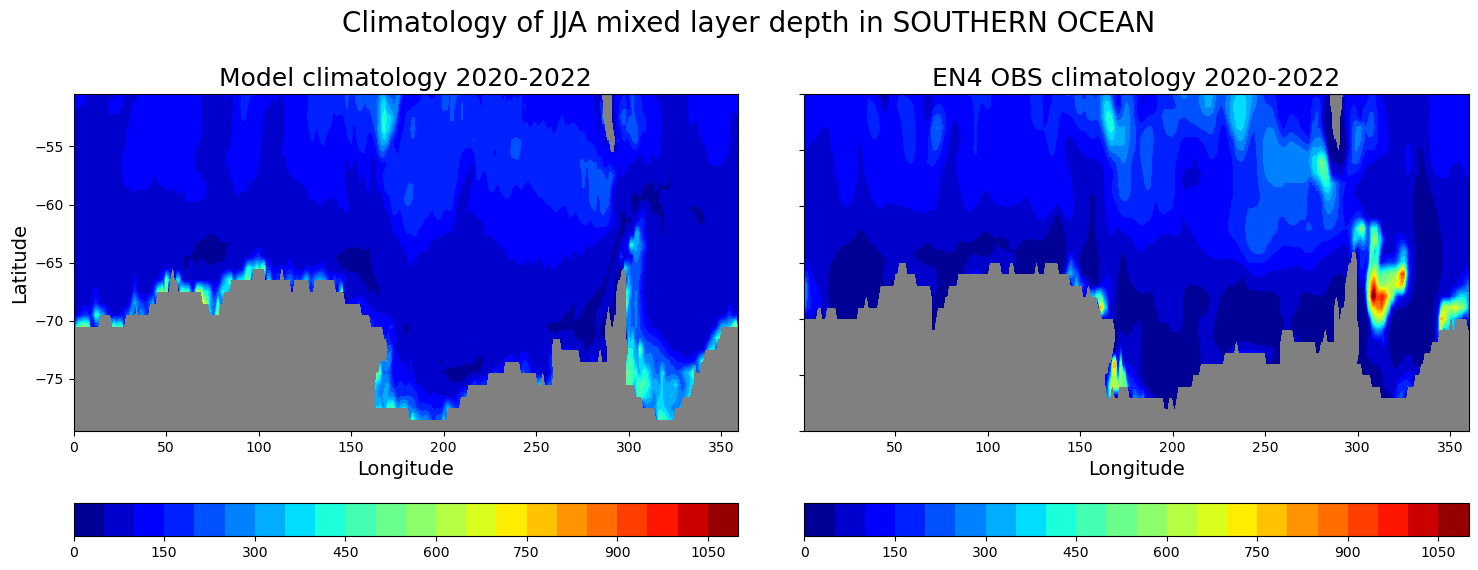

In [58]:
# This example plots MLD climatology in the southern ocean in the austral winter (JJA)
fn.plot_spatial_mld_clim(data, region= "southern ocean",time = "JJA",overlap= True, output= True, output_dir="./output")
